In [120]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# these are our constants
N = 5  # number of variables
F = 8# forcing

def Lorenz96(x,t):

  # compute state derivatives
    d = np.zeros(N)
  # first the 3 edge cases: i=1,2,N
    d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
    d[1] = (x[2] - x[N-1]) * x[0]- x[1]
    d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
  # then the general case
    for i in range(2, N-1):
        d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
  # add the forcing term
    d = d + F

  # return the state derivatives
    return d

x0 = F*np.ones(N) # initial state (equilibrium)
x0[1] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 50.0, 0.9)

x = odeint(Lorenz96, x0, t)

In [121]:
noise_percent = 0.02
noise = np.random.normal(scale=noise_percent*np.max(np.abs(x)), size=x.shape)
x_noisy = x + noise

In [122]:
#Remove transient terms from time series

idx_start = int((0.075)*t.size)
#print(idx_start)
x_reshape = x[:,:]
x_noisy_reshape = x_noisy[idx_start:,:]

x_noisy_reshape = x_noisy_reshape / np.amax(np.absolute(x_noisy_reshape))


#t = t[idx_start:]

x1 = x[idx_start:,0]
x2 = x[idx_start:,1]
x3 = x[idx_start:,2]
x4 = x[idx_start:,3]
x5 = x[idx_start:,4]


x1_noisy = x_noisy_reshape[idx_start:,0]
x2_noisy = x_noisy_reshape[idx_start:,1]
x3_noisy = x_noisy_reshape[idx_start:,2]
x4_noisy = x_noisy_reshape[idx_start:,3]
x5_noisy = x_noisy_reshape[idx_start:,4]

4
(56,)


(48,)
(52,)


In [123]:
np.save('generated_l96_data/l96_%02.1f/gen_l96_%02.1f.npy'%(t[1]-t[0],t[1] - t[0]), x1)
np.save('generated_l96_data/l96_%02.1f/gen_l96_noisy_%02.1f.npy'%(t[1]-t[0],t[1]-t[0]), x1_noisy)

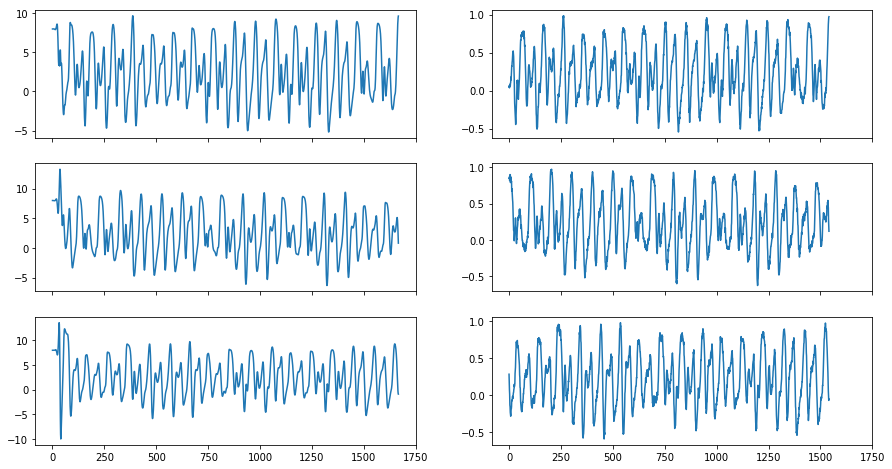

In [95]:
fig, ax = plt.subplots(3,2, sharex=True, figsize=(15,8))

for i in xrange(3):
    for j in xrange(2):
        if j == 0:
            ax[i,j].plot(x[:,i])
        if j == 1:
            ax[i,j].plot(x_noisy_reshape[:,i])

plt.show()

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
bx = fig.gca(projection='3d')
bx.plot(x1,x2,x3)
bx.set_xlabel('$x_1$')
bx.set_ylabel('$x_2$')
bx.set_zlabel('$x_3$')

Text(0.5,0,u'$x_3$')

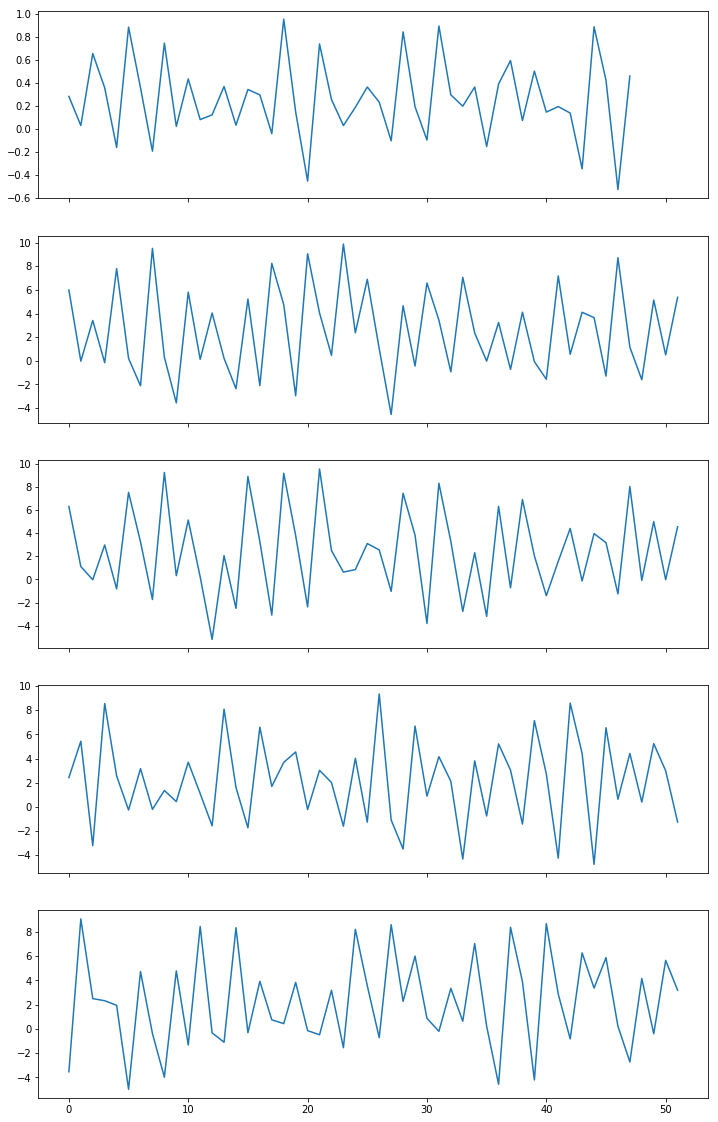

In [136]:
figs, ax = plt.subplots(5,1, figsize = (12,20),sharex = True)


ax[0].plot(x1_noisy)

ax[1].plot(x2)
ax[2].plot(x3)
ax[3].plot(x4)
ax[4].plot(x5)

plt.show()

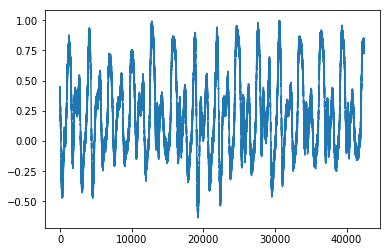

In [138]:
fig2 = plt.figure()
cc = plt.plot(np.load('generated_l96_data/l96_0.001/gen_l96_noisy_0.001.npy'))
plt.show()